In [1]:
import sys,time
sys.path.append('../../')
from smodels.experiment.defaultFinalStates import finalStates
from smodels.experiment.expSMS import ExpSMS
from smodels.decomposition.theorySMS import TheorySMS
from smodels.share.models.mssm import BSMList
from smodels.share.models.SMparticles import SMList
from smodels.base.model import Model
from smodels.base.physicsUnits import fb, GeV, TeV, pb
from smodels.experiment.txnameObj import TxName, TxNameData
from smodels.experiment.infoObj import Info
from smodels.experiment.expAuxiliaryFuncs import rescaleWidth
import numpy as np
import unum

In [2]:
filePath = '../database/13TeV/ATLAS/ATLAS-SUSY-2016-08/data/T5Disp.txt'
globalInfo = Info('../database/13TeV/ATLAS/ATLAS-SUSY-2016-08/globalInfo.txt')
infoObj = Info('../database/13TeV/ATLAS/ATLAS-SUSY-2016-08/data/dataInfo.txt')
databaseParticles = finalStates
tx = TxName(filePath,globalInfo,infoObj,databaseParticles)

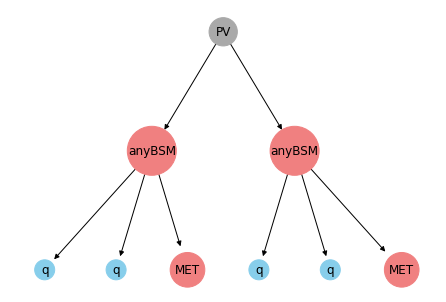

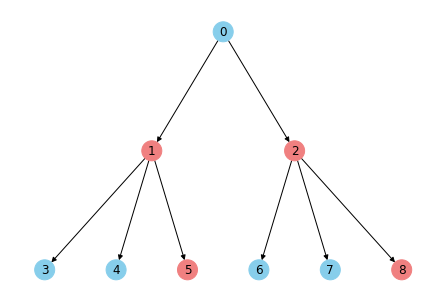

[(0, PV), (1, anyBSM), (2, anyBSM), (3, q), (4, q), (5, MET), (6, q), (7, q), (8, MET)]


In [3]:
el = list(tx.smsMap.keys())[0]
el.draw()
el.draw(labelAttr='node')
print([(n,node) for n,node in zip(el.nodeIndices,el.nodes)])

In [4]:
for k in sorted(tx.dataMap.keys()):
    print(k,tx.dataMap[k])

0 (1, 'mass', 1.00E+00 [GeV])
1 (5, 'mass', 1.00E+00 [GeV])
2 (2, 'mass', 1.00E+00 [GeV])
3 (8, 'mass', 1.00E+00 [GeV])
4 (1, 'totalwidth', 1.00E+00 [GeV])
5 (2, 'totalwidth', 1.00E+00 [GeV])


In [5]:
for k in sorted(tx.arrayMap.keys()):
    print(k,tx.arrayMap[k])

0 ((0, 0, 0), 'mass', 1.00E+00 [GeV], 1)
1 ((0, 1, 0), 'mass', 1.00E+00 [GeV], 5)
2 ((1, 0, 0), 'mass', 1.00E+00 [GeV], 2)
3 ((1, 1, 0), 'mass', 1.00E+00 [GeV], 8)
4 ((0, 0, 1), 'totalwidth', 1.00E+00 [GeV], 1)
5 ((1, 0, 1), 'totalwidth', 1.00E+00 [GeV], 2)


In [6]:
print(tx.y_unit)

1.00E+00 [fb]


In [7]:
massPoint = [[(100*GeV,1e-3*GeV),50*GeV],[(0.2*TeV,1e6*GeV),10*GeV]]
print([np.round(x,4) for x in tx.transformPoint(massPoint)])

[100.0, 50.0, 200.0, 10.0, 62.1698, 82.8931]


In [8]:
data = [ [[[(100*GeV,1e-3*GeV),50*GeV],[(200*GeV,1e6*GeV),10*GeV]],0.1*fb],  
        [[[(400*GeV,1*GeV),150*GeV],[(300*GeV,10*GeV),30*GeV]],10.*pb]]
xvalues,yvalues = tx.transformData(data)
for ix,x in enumerate(xvalues):
    print([np.round(xx,4) for xx in x],np.round(yvalues[ix],4))

[100.0, 50.0, 200.0, 10.0, 62.1698, 82.8931] 0.1
[400.0, 150.0, 300.0, 30.0, 69.0776, 71.3801] 10000.0


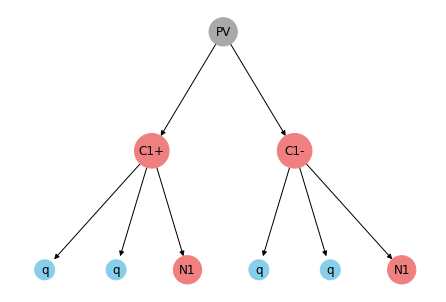

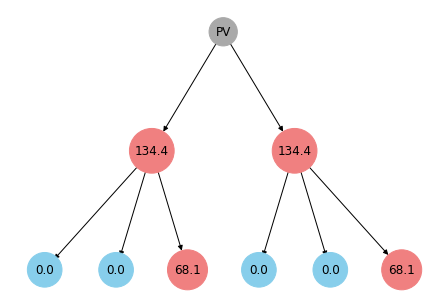

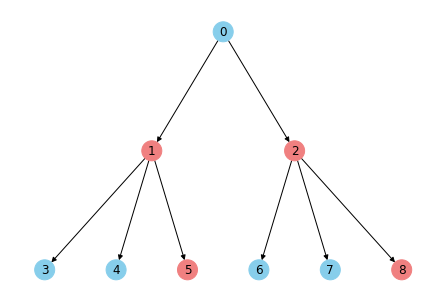

[(0, PV), (1, C1+), (2, C1-), (3, q), (4, q), (5, N1), (6, q), (7, q), (8, N1)]
[None, 1.34E+02 [GeV], 1.34E+02 [GeV], 0.00E+00 [MeV], 0.00E+00 [MeV], 6.81E+01 [GeV], 0.00E+00 [MeV], 0.00E+00 [MeV], 6.81E+01 [GeV]]


In [9]:
slhafile="../../inputFiles/slha/lightEWinos.slha"
model = Model(BSMList,SMList)
model.updateParticles(inputFile=slhafile,promptWidth = 1e-12*GeV)
# Hack to create a theory element from a string:
expSMS = ExpSMS.from_string("[[['u','u~']],[['d','d~']]]",model=model,
             intermediateState=[['C1+'],['C1-']],finalState=['N1','N1'])
elB = TheorySMS()
elB.add_nodes_from(expSMS.nodes)
elB.add_edges_from(expSMS.edgeIndices)
elB.prodXSec = 1.0*fb
elB.maxWeight = 1.0*fb
elB.setGlobalProperties()

elMatch = el.matchesTo(elB)
elMatch.draw()
elMatch.draw(labelAttr='mass',attrUnit=GeV)
elMatch.draw(labelAttr='node')

print(list(zip(elMatch.nodeIndices,elMatch.nodes)))
print(elMatch.mass)

In [10]:
elementData = [np.round(x,3) for x in tx.getDataFromSMS(elMatch)]
print(elementData)
v = tx.txnameData.getValueFor(elementData)
print(v)
reweigtF = tx.getReweightingFor(elMatch)
print(reweigtF)

[134.4, 68.1, 134.4, 68.1, 184.207, 184.207]
None
1.0


In [11]:
elementData = [1450.,100.,1450.,100.,rescaleWidth(5e-17),rescaleWidth(5e-17)]
v = tx.txnameData.getValueFor(elementData)
print(np.round(v,4),'(expected  ~ 1.5)')

1.5474 (expected  ~ 1.5)


In [12]:
# Change chargino width to get a result:
C1p = model.getParticlesWith(label='C1+')[0]
C1m = model.getParticlesWith(label='C1-')[0]
N1 = model.getParticlesWith(label='N1')[0]
C1p.totalwidth = 5e-17*GeV
C1m.totalwidth = 5e-17*GeV
C1p.mass = 1450.*GeV
C1m.mass = 1450.*GeV
N1.mass = 100.*GeV
v = tx.getULFor(elMatch)
print(v)

1.55E+00 [fb]


In [13]:
p = tx.txnameData.PCAtransf(elementData)
# print(p)
pInv = tx.txnameData.inversePCAtransf(p)
pInv = [tx.txnameData.round_to_n(x,5) for x in pInv[:]]
print(pInv)
print(pInv == [tx.txnameData.round_to_n(x,5) for x in elementData])

[1450.0, 100.0, 1450.0, 100.0, 31.543, 31.543]
True


In [14]:
print(tx.inverseTransformPoint(elementData))

[[(1.45E+03 [GeV], 5.00E-17 [GeV2]), 1.00E+02 [GeV]], [(1.45E+03 [GeV], 5.00E-17 [GeV2]), 1.00E+02 [GeV]]]
